In [1]:
import pandas as pd
import random
import numpy as np
import concurrent.futures as cf

In [32]:
course = pd.read_csv('data/course.csv')
course.head()


,lecturer_in_charge_id,course_name,total_credit,theory_credit,practice_credit,self_learning_credit
0,1,Toán cao cấp 1,3,3,0,4
1,1,Giáo dục thể chất 1,5,3,2,5
2,1,Giáo dục Quốc phòng và An ninh 1,3,1,2,3
3,1,Nhập môn Tin học,3,3,0,3
4,1,Nhập môn Lập trình,4,0,4,5


In [33]:
import random

range(1, 81)

In [40]:
course['lecturer_in_charge_id'] = random.sample(list(range(1, 81)), k=80)

In [41]:
course.to_csv('./data/course.csv', index=False, header=True, encoding='utf-8-sig')

In [29]:
teaching.iloc[:, 1:].to_csv('./data/teaching.csv', index=False, header=True, encoding='utf-8-sig')

In [18]:
def swap_columns(df, col1, col2):
    col_list = list(df.columns)
    x, y = col_list.index(col1), col_list.index(col2)
    col_list[y], col_list[x] = col_list[x], col_list[y]
    df = df[col_list]
    return df

In [21]:
program = swap_columns(program, 'program_semester', 'class_of')

In [22]:
program.head()

,program_id,class_of,program_semester,abc_of
0,1,2019-2023,1,a
1,2,2019-2023,2,a
2,3,2019-2023,3,a
3,4,2019-2023,4,a
4,5,2019-2023,5,a


In [23]:
program_new = program.iloc[:, 1:]

In [24]:
program_new.to_csv('./data/program.csv', index=False, header=True, encoding='utf-8-sig')

In [2]:
address = pd.read_csv('data/address.csv')
course = pd.read_csv('data/course.csv')
employee = pd.read_csv('data/employee.csv')
program = pd.read_csv('data/program.csv')
student = pd.read_csv('data/student.csv')
lecturer = pd.read_csv('data/lecturer.csv')

In [3]:
mssv_class_names = student.class_name.apply(lambda x: x[:6]).unique().tolist() + ['CNTT15',
                                                               'CNTT16', 'HTTT16', 'KTPM16', 'KHMT16', 'KHDL16']
print(mssv_class_names)

['KHDL15', 'HTTT15', 'KTPM15', 'KHMT15', 'CNTT15', 'CNTT16', 'HTTT16', 'KTPM16', 'KHMT16', 'KHDL16']


In [4]:
mssv_class_names = ['CNTT15', 'CNTT16', 'HTTT15', 'HTTT16', 'KHDL15', 'KHDL16', 'KHMT15', 'KHMT16', 'KTPM15', 'KTPM16']
print(mssv_class_names)

['CNTT15', 'CNTT16', 'HTTT15', 'HTTT16', 'KHDL15', 'KHDL16', 'KHMT15', 'KHMT16', 'KTPM15', 'KTPM16']


In [5]:
class_code = 'ABC'

In [6]:
class_name_fakes = [random.choice(mssv_class_names) + random.choice(class_code) for _ in range(student.shape[0])]

In [7]:
student['class_name'] = class_name_fakes

In [8]:
student.class_name.value_counts().values

array([94, 88, 86, 85, 85, 82, 82, 81, 79, 77, 76, 74, 74, 73, 72, 71, 69,
       67, 66, 66, 66, 65, 65, 63, 62, 61, 60, 58, 58, 56], dtype=int64)

In [9]:
teaching_data = []
idx = 1
for i, row in course[['course_id', 'semester_id']].iterrows():
    course_id, semester_id = row
    for program_id in program[program.program_semester == semester_id].program_id.values:
        teaching_data.append({'teaching_id': idx, 'course_id': course_id, 'program_id': program_id})
        idx += 1
teaching_df = pd.DataFrame(teaching_data)
teaching_df.to_csv('data/teaching.csv', index=False)

In [10]:
course.head()

,course_id,lecturer_in_charge_id,course_name,total_credit,theory_credit,practice_credit,self_learning_credit,major_abbr,name_code,semester_id
0,1,1,Toán cao cấp 1,3,3,0,4,khdl15,2113431,1
1,2,1,Giáo dục thể chất 1,5,3,2,5,khdl15,2120405,1
2,3,1,Giáo dục Quốc phòng và An ninh 1,3,1,2,3,khdl15,2120501,1
3,4,1,Nhập môn Tin học,3,3,0,3,khdl15,2101539,1
4,5,1,Nhập môn Lập trình,4,0,4,5,khdl15,2101622,1


In [11]:
offering_data = []
idx = 1
for lecturer_id in range(1, lecturer.shape[0] + 1):
    num_course_of_teacher = random.randint(1, 10)
    for _, row in course.sample(num_course_of_teacher)[['course_id', 'theory_credit', 'practice_credit']].iterrows():
        course_id = row.course_id
        is_theory = row.theory_credit > 0
        is_practice = row.practice_credit > 0
        if is_theory:
            offering_data.append({'offering_id': idx, 'lecturer_id': lecturer_id, 'course_id': course_id, 'lecturer_type': 'theoretical'})
            idx += 1
        if is_practice:
            offering_data.append({'offering_id': idx, 'lecturer_id': lecturer_id, 'course_id': course_id, 'lecturer_type': 'practical'})
            idx += 1
offering_data = pd.DataFrame(offering_data)
offering_data.to_csv('data/course_offering.csv', index=False)

In [12]:
offering_data

,offering_id,lecturer_id,course_id,lecturer_type
0,1,1,48,theoretical
1,2,1,48,practical
2,3,1,65,theoretical
3,4,1,65,practical
4,5,1,10,theoretical
...,...,...,...,...
1601,1602,168,45,theoretical
1602,1603,168,45,practical
1603,1604,168,53,theoretical
1604,1605,168,53,practical


In [13]:
display(offering_data)

,offering_id,lecturer_id,course_id,lecturer_type
0,1,1,48,theoretical
1,2,1,48,practical
2,3,1,65,theoretical
3,4,1,65,practical
4,5,1,10,theoretical
...,...,...,...,...
1601,1602,168,45,theoretical
1602,1603,168,45,practical
1603,1604,168,53,theoretical
1604,1605,168,53,practical


In [14]:
score_range = np.linspace(0, 10, 21)
score_range

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

In [15]:
0.05 > 0.025

True

In [16]:
0.4 + 0.05 - 0.025

0.425

In [17]:
0.025 - 0.005

0.02

In [18]:
score_dist = {
    (0, 0.5, 1, 1.5, 2): 0.005,
    (2.5, 3, 3.5, 4, 4.5): 0.1,
    (5, 5.5, 6, 6.5, 7): 0.425,
    (7.5, 8, 8.5): 0.27,
    (9, 9.5, 10): 0.2
}

In [19]:
dist = []
for key, val in score_dist.items():
    for k in key:
        dist.append(val / len(key))
dist = np.array(dist)
dist

array([0.001     , 0.001     , 0.001     , 0.001     , 0.001     ,
       0.02      , 0.02      , 0.02      , 0.02      , 0.02      ,
       0.085     , 0.085     , 0.085     , 0.085     , 0.085     ,
       0.09      , 0.09      , 0.09      , 0.06666667, 0.06666667,
       0.06666667])

In [20]:
plt.plot(dist)

NameError: name 'plt' is not defined

In [21]:
offering_data.sample(1)

,offering_id,lecturer_id,course_id,lecturer_type
832,833,85,44,practical


In [353]:
offering_data[offering_data.lecturer_type == 'practical']

,offering_id,lecturer_id,course_id,lecturer_type
1,2,1,57,practical
3,4,1,61,practical
5,6,1,45,practical
8,9,1,55,practical
10,11,1,44,practical
...,...,...,...,...
1482,1483,165,14,practical
1484,1485,165,42,practical
1486,1487,166,61,practical
1488,1489,167,69,practical


In [391]:
score_type_theory = ['tk_1', 'tk_2', 'tk_3', 'gk', 'ck']
score_type_practice = ['th_1', 'th_2', 'th_3']
    
def generate_score_data(student_id):
    score_data = []
    
    num_offering_take = random.randint(1, 60)
    theoretical_sample = offering_data[offering_data['lecturer_type'] == 'theoretical'].sample(num_offering_take)
    
    offering_id = theoretical_sample.offering_id
    lecturer_id = theoretical_sample.lecturer_id
    course_id = theoretical_sample.course_id
    
    theoretical_scores = np.random.choice(score_range, p=dist, size=len(offering_id) * len(score_type_theory))
    theoretical_scores = theoretical_scores.reshape(offering_id.shape[0], len(score_type_theory))
    
    for i, off_id in enumerate(offering_id):
        for j, score_type in enumerate(score_type_theory):
            score_data.append({'student_id': student_id,
                               'offering_id': off_id,
                               'score': theoretical_scores[i, j],
                               'score_type': score_type})
    
    for lec_id, cor_id in zip(lecturer_id, course_id):
        prac_sample = offering_data[(offering_data.lecturer_id == lec_id) &
                                    (offering_data.course_id == cor_id) &
                                    (offering_data.lecturer_type == 'practical')]
        if prac_sample.shape[0] == 1:
            practical_scores = np.random.choice(score_range, p=dist, size=len(score_type_practice))
            for i, score_type in enumerate(score_type_practice):
                score_data.append({'student_id': student_id,
                                   'offering_id': prac_sample.offering_id.values[0],
                                   'score': practical_scores[i],
                                   'score_type': score_type})
                
    return score_data

In [407]:
student_id_list = student.mssv.values.tolist()
with cf.ThreadPoolExecutor(max_workers=8) as exe:
    score_data = list(exe.map(generate_score_data, student_id_list))

In [413]:
score_data = [j for i in score_data for j in i]
len(score_data)

479858

In [414]:
score_df = pd.DataFrame(score_data)
score_df

,student_id,offering_id,score,score_type
0,19333301,163,6.0,tk_1
1,19333301,163,5.5,tk_2
2,19333301,163,9.5,tk_3
3,19333301,163,5.0,gk
4,19333301,163,3.0,ck
...,...,...,...,...
479853,19354901,835,6.0,th_2
479854,19354901,835,9.0,th_3
479855,19354901,50,7.0,th_1
479856,19354901,50,10.0,th_2


<AxesSubplot:ylabel='Frequency'>

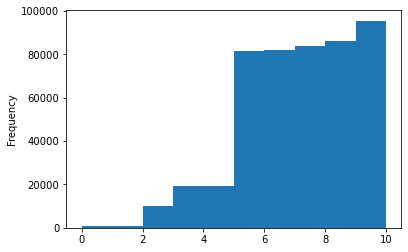

In [415]:
score_df.score.plot(kind='hist')

In [416]:
score_df.to_csv('data/score.csv', index=False)

---